In [1]:
import csv
import pandas as pd
from cycler import cycler
import matplotlib.pyplot as plt

In [2]:
from user import User
from ad import Ad

In [3]:
from utilities import generate_clicks, print_info, print_ctrs, print_regret, generate_dataset, print_best_ad, print_all, print_ads
from algorithms import RandomSelection, EpsilonGreedy, ExploreFirst, BoltzmannExploration, UCB, ThompsonSampling
import c

In [4]:
# Plot settings
plt.rc('axes', edgecolor = c.nordblack)
plt.rc('xtick', color = c.nordblack)
plt.rc('ytick', color = c.nordblack)
plt.rcParams['text.color'] = c.nordblack

plt.rcParams['lines.linewidth'] = 2
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (9, 6)

plt.rcParams['axes.prop_cycle'] = cycler('color', [c.nordblue, c.nordgreen, c.nordorange, c.nordmagenta ,c.nordyellow, c.nordcyan])

**Generate Dataset**

In [5]:
N_ads = 3
N_users = 1000
ads = generate_dataset(N_users,N_ads)

In [6]:
df = pd.read_csv("dataset.csv")
df.head()

,ad0,ad1,ad2,age,sex,occupation,interested_in
0,0,1,0,3,1,2,5
1,0,0,1,2,1,2,2
2,1,0,1,2,1,1,4
3,0,0,0,3,1,2,2
4,0,1,0,2,1,2,5


**Print ADs**

In [7]:
print_ads(ads)

Ad: (3, 2, 3, 4)
Ad: (3, 2, 2, 5)
Ad: (2, 2, 2, 4)


**Best AD**

In [8]:
print_best_ad(df, N_users, N_ads)

Ad #0 CTR = 0.44
Ad #1 CTR = 0.45
Ad #2 CTR = 0.48
The Ad with the best CTR is: 2


**Random Selection**

In [9]:
ad_list, total_reward, ctr, real_ctr, regret_list = RandomSelection(df)

100%|██████████| 1000/1000 [00:00<00:00, 81460.20it/s]


Ad #0 has been shown 38.50 % of the time.
Ad #1 has been shown 29.30 % of the time.
Ad #2 has been shown 32.20 % of the time.

Total Reward (Number of Clicks): 450


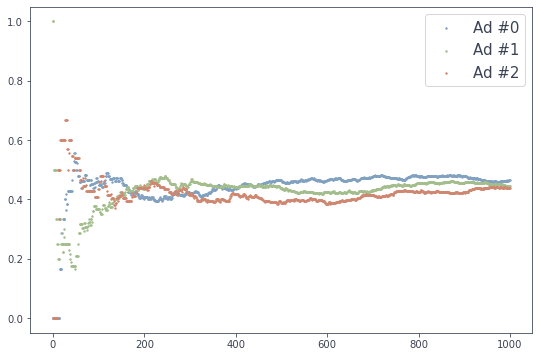

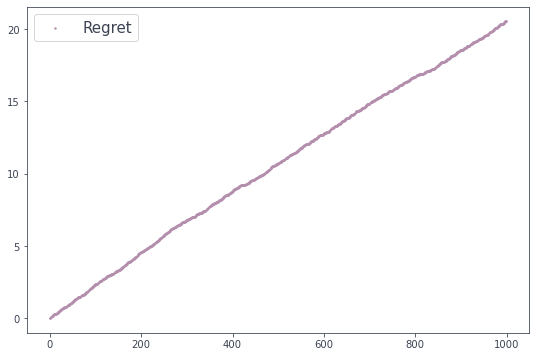

In [10]:
print_all(N_users, N_ads, ad_list, total_reward, ctr, real_ctr, regret_list)

**ExploreFirst**

In [11]:
ad_list, total_reward, ctr, real_ctr, regret_list = ExploreFirst(df, eps = 0.30)

100%|██████████| 1000/1000 [00:00<00:00, 65291.16it/s]


Ad #0 has been shown 77.60 % of the time.
Ad #1 has been shown 10.00 % of the time.
Ad #2 has been shown 12.40 % of the time.

Total Reward (Number of Clicks): 449


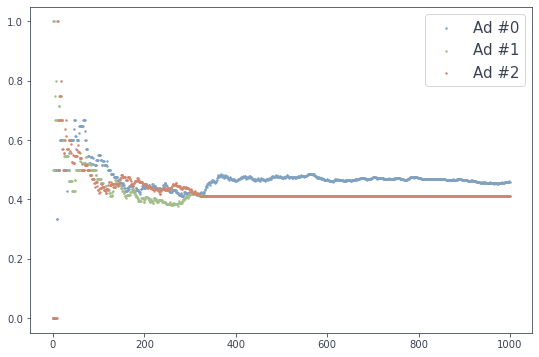

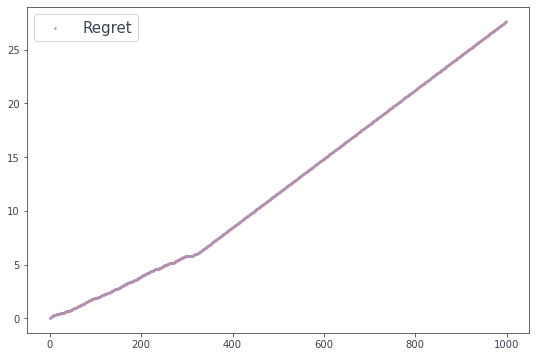

In [12]:
print_all(N_users, N_ads, ad_list, total_reward, ctr, real_ctr, regret_list)

**Epsilon greedy**

In [13]:
ad_list, total_reward, ctr, real_ctr, regret_list = EpsilonGreedy(df, eps = 0.30)

100%|██████████| 1000/1000 [00:00<00:00, 60194.66it/s]


Ad #0 has been shown 9.90 % of the time.
Ad #1 has been shown 10.30 % of the time.
Ad #2 has been shown 79.80 % of the time.

Total Reward (Number of Clicks): 466


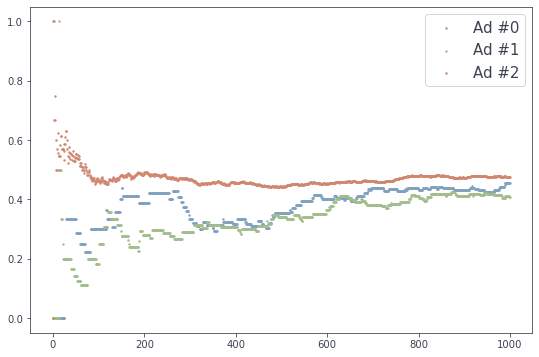

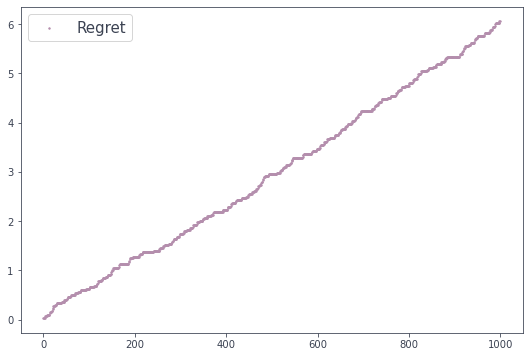

In [14]:
print_all(N_users, N_ads, ad_list, total_reward, ctr, real_ctr, regret_list)

**Boltzmann Exploration**

Big $\tau$ means exploration.
Small $\tau$ means exploitation

In [15]:
ad_list, total_reward, ctr, real_ctr, regret_list = BoltzmannExploration(df, tau = 1)

100%|██████████| 1000/1000 [00:00<00:00, 18845.13it/s]


Ad #0 has been shown 30.30 % of the time.
Ad #1 has been shown 37.30 % of the time.
Ad #2 has been shown 32.40 % of the time.

Total Reward (Number of Clicks): 444


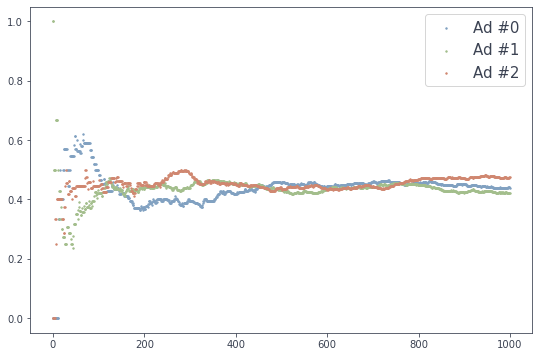

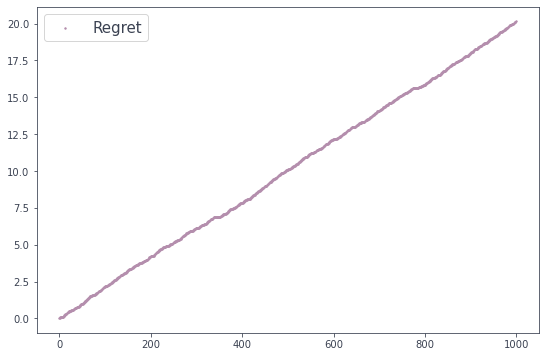

In [16]:
print_all(N_users, N_ads, ad_list, total_reward, ctr, real_ctr, regret_list)

**Uper Confidence Bound (UCB)**

In [17]:
ad_list, total_reward, ctr, real_ctr, regret_list = UCB(df)

  0%|          | 0/1000 [00:00<?, ?it/s]/home/jovoni/Desktop/UNITS/Probabilistic_machine_learning/MAB/algorithms.py:277: RuntimeWarning: invalid value encountered in sqrt
  U = [average_reward[j] + np.sqrt(2 * np.log(i + eps) / (impressions[j] + eps)) for j in range(N_ads)]
100%|██████████| 1000/1000 [00:00<00:00, 27123.20it/s]


Ad #0 has been shown 27.10 % of the time.
Ad #1 has been shown 33.50 % of the time.
Ad #2 has been shown 39.40 % of the time.

Total Reward (Number of Clicks): 472


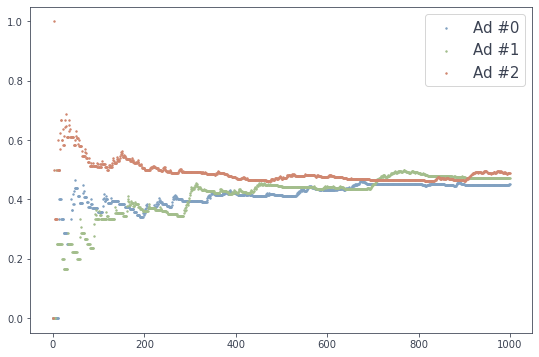

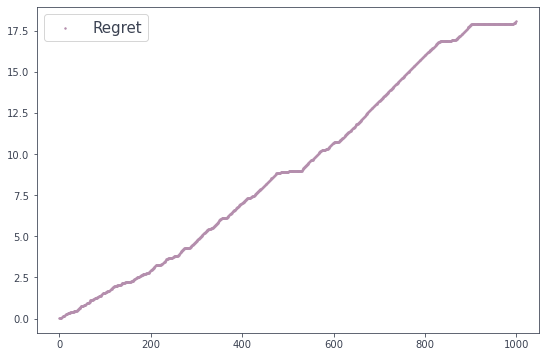

In [18]:
print_all(N_users, N_ads, ad_list, total_reward, ctr, real_ctr, regret_list)

**Thompson Sampling**

In [19]:
ad_list, total_reward, ctr, real_ctr, regret_list, a, b = ThompsonSampling(df)

100%|██████████| 1000/1000 [00:00<00:00, 1940.98it/s]


Ad #0 has been shown 2.20 % of the time.
Ad #1 has been shown 56.70 % of the time.
Ad #2 has been shown 41.10 % of the time.

Total Reward (Number of Clicks): 480


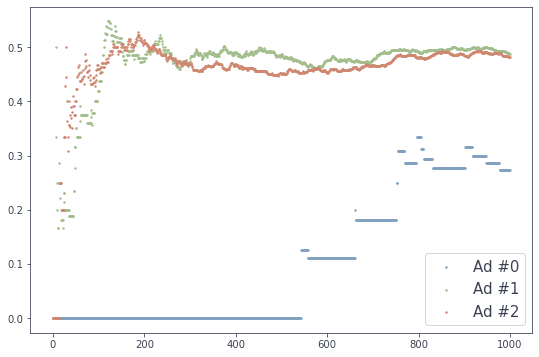

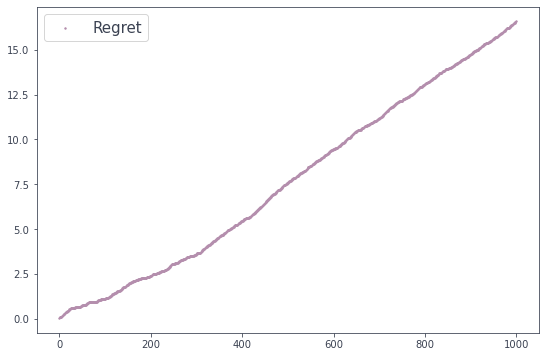

In [20]:
print_all(N_users, N_ads, ad_list, total_reward, ctr, real_ctr, regret_list)